In [1]:
library(ggplot2)
library(lubridate)
library(dplyr)
library(jsonlite)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
#' # Definition des chemins de l'environnement de travail et des fichiers
json_data <- fromJSON("galaxy_inputs/galaxy_inputs.json")

## input data
obs_path <- json_data$obs$path
unitobs_path <- json_data$unitobs$path
refesp_path <- json_data$refesp$path

# Récupération des valeurs utilisateurs

## mrt.f
agregation            <- json_data$agregation
metrique            <- json_data$metrique
factGraph            <- json_data$factGraph
factGraphSel            <- json_data$factGraphSel
listFact            <- json_data$listFact
listFactSel            <- json_data$listFactSel
tableMetrique            <- json_data$tableMetrique



In [3]:
system("conda install -y openssl=3.5.0 r-rgdal=1.6_7 r-svglite=2.1_3 r-tibble=3.3.0 r-r.oo=1.27.1 r-multcomp=1.4_28 r-geosphere=1.5_20 r-gamlss=5.4_22 lcms2 r-prettyunits s3transfer r-tkrplot r-permute r-vegan r-svdialogs r-maptools jmespath r-tcltk2 r-rgeos r-textshaping r-systemfonts r-leafpop r-r.utils r-sf r-leaflet")

In [5]:
devtools::install_github("madelinm/Package_PAMPA", INSTALL_opts="--no-staged-install" , dep = FALSE)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpBUaTvt/remotes3333579c832/madelinm-Package_PAMPA-014b31f/DESCRIPTION’ ... OK
* preparing ‘PAMPA’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘PAMPA_0.1.0.tar.gz’



In [6]:
library("PAMPA")

Please note that 'maptools' will be retired during October 2023,
plan transition at your earliest convenience (see
https://r-spatial.org/r/2023/05/15/evolution4.html and earlier blogs
for guidance);some functionality will be moved to 'sp'.
 Checking rgeos availability: TRUE

Warning message:
“no DISPLAY variable so Tk is not available”
Warning message:
“loading Rplot failed”
Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-7, (SVN revision 1203)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.8.5, released 2024/04/02
Path to GDAL shared files: /opt/conda/envs/rlang-kernel/share/gdal
 GDAL does not use iconv for recoding strings.
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 9.4.0, March 1st, 2024, [PJ

In [7]:
#' # Creation d'environnements
.baseEnv <- environment()
.dataEnv <- new.env()

assign(".baseEnv", .baseEnv, .GlobalEnv)
assign(".dataEnv", .dataEnv, .GlobalEnv)

#' # Definition des chemins de l'environnement de travail et des fichiers
ws_path <- 'galaxy_inputs'

filePathes <- c(unitobs = unitobs_path, obs = obs_path, refesp =  refesp_path, ws = ws_path)

#' # Lancement du chargement
data <- PAMPA::load_files.f(filePathes, dminMax = 5, .dataEnv, .baseEnv)

[1] "The directory 'PAMPA' was created at '/home/jovyan//PAMPA_package'"
[1] "No spatial reference defined or file not found!"
[1] "No local species reference table defined, or file cannot be read."
[1] "Calculation of weights"
[1] "Estimation of weights for the MPA:"
[1] "Calculate metrics per station, species and size class..."
[1] "Calculating metrics per observation unit and species..."
[1] "Calculating metrics per observation unit..."
[1] "30 \"species.code\" not identified at the species (\"sp.\") level\n   have been deleted for calculation of the biodiversity metrics."
[1] "Additional tables (for complementary calculations) have been created:\n\t* TableUnitSpSz : metrics per size class/species/observation unit.\n\t* TableUnitSp : metrics per species/observation unit.\n\t* TableUnit : metrics (incl. biodiversity) per observation unit.\n\t* DataObs, DataUnitobs, DataRefesp : data tables."


NULL

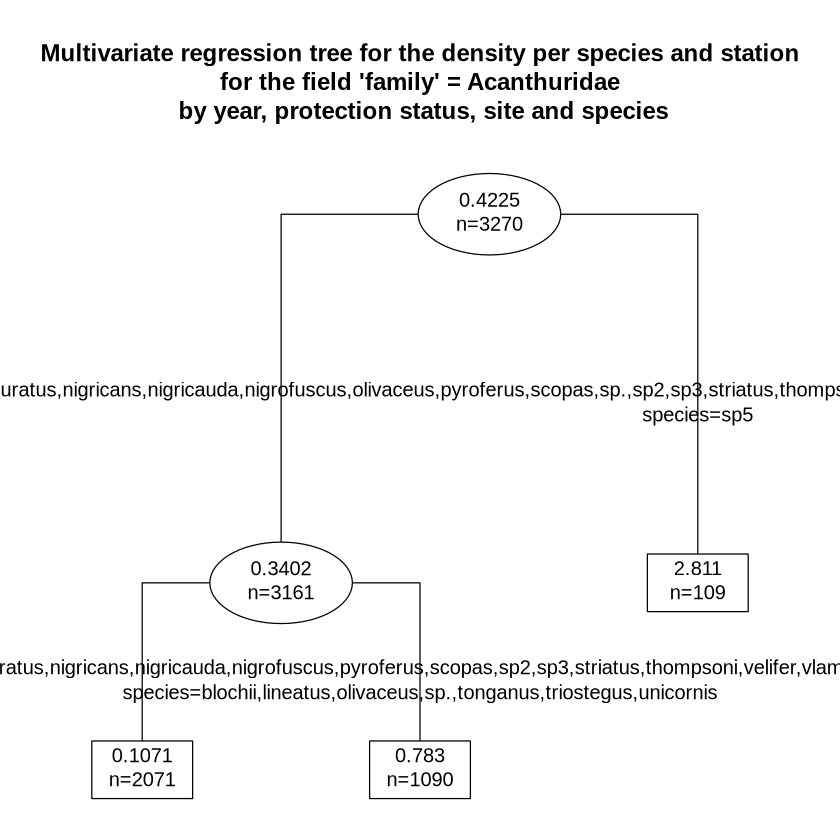

In [40]:
mrt.f(agregation = agregation, metrique = metrique, factGraph = factGraph, factGraphSel = factGraphSel, listFact = listFact, listFactSel = listFactSel, tableMetrique = tableMetrique, new_window = FALSE, dataEnv = .dataEnv, baseEnv = .baseEnv)

In [44]:
png(filename="outputs/collection/mrt_Acanthuridae_year_protection-status_site_species.png")
mrt.f(agregation = agregation, metrique = metrique, factGraph = factGraph, factGraphSel = factGraphSel, listFact = listFact, listFactSel = listFactSel, tableMetrique = tableMetrique, new_window = FALSE, dataEnv = .dataEnv, baseEnv = .baseEnv)
dev.off()

NULL

pdf 
  2